https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [1]:
# import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [2]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [3]:
dataset=pd.read_csv("Shampoo.csv", date_parser=parser,parse_dates=[0])
display(dataset)

C:\Users\dogan\AppData\Local\Temp\ipykernel_10504\4175343489.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


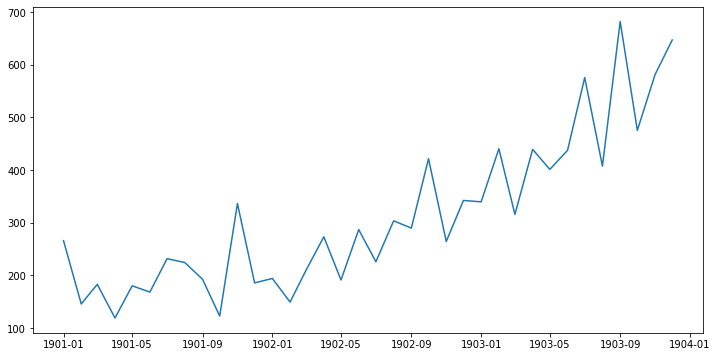

In [4]:
plt.figure(figsize=(12,6))
plt.plot(dataset["Month"].values, dataset["Sales"].values)

In [5]:
def timeseries_to_supervised(df,n_in, n_out):
    cols = list()
    names = list()
    for i in range(n_in,0,-1):
        cols.append(df["Sales"].shift(i))
        names += [("Sales(t-%d)"%(i))]
    for i in range(n_out):
        cols.append(df["Sales"].shift(-i))
        if i == 0:
            names += [("Sales(t)")]
        else:
            names += [("Sales(t+%d)"%(i))]
#     print(cols)
#     print(names)
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg["Month"] = df["Month"]
    agg.dropna(inplace=True)
    return agg
    

In [6]:
window = 10
n_months = 2
n_features = 1
df = timeseries_to_supervised(dataset, window, n_months)
display(df)

,Sales(t-10),Sales(t-9),Sales(t-8),Sales(t-7),Sales(t-6),Sales(t-5),Sales(t-4),Sales(t-3),Sales(t-2),Sales(t-1),Sales(t),Sales(t+1),Month
10,266.0,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9,1901-11-01
11,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9,194.3,1901-12-01
12,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9,194.3,149.5,1902-01-01
13,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9,194.3,149.5,210.1,1902-02-01
14,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9,194.3,149.5,210.1,273.3,1902-03-01
15,168.5,231.8,224.5,192.8,122.9,336.5,185.9,194.3,149.5,210.1,273.3,191.4,1902-04-01
16,231.8,224.5,192.8,122.9,336.5,185.9,194.3,149.5,210.1,273.3,191.4,287.0,1902-05-01
17,224.5,192.8,122.9,336.5,185.9,194.3,149.5,210.1,273.3,191.4,287.0,226.0,1902-06-01
18,192.8,122.9,336.5,185.9,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,1902-07-01
19,122.9,336.5,185.9,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,289.9,1902-08-01


In [7]:
df.set_index("Month",inplace=True)

The trend can be removed from the observations, then added back to forecasts later to return the prediction to the original scale and calculate a comparable error score.

In [8]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler = scaler.fit(df.values)
data_sc = scaler.transform(df.values)

In [9]:
# print(data_sc)

In [10]:
# print(df.values)

In [11]:
train, test = data_sc[:-8,:], data_sc[-8:,:]
X_train, y_train = train[:,:-n_months], train[:,-n_months:]
X_test, y_test = test[:,:-n_months], test[:,-n_months:]

# reshape for LSTM
X_train = X_train.reshape(X_train.shape[0],window,n_features)
X_test = X_test.reshape(X_test.shape[0],window,n_features)

In [12]:
# print("X train")
# print(X_train)
# print("y train")
# print(y_train)
# print("X test")
# print(X_test)
# print("y test")
# print(y_test)

In [13]:
epochs = 2000

model = Sequential()
model.add(LSTM(64,input_shape=(window,n_features),stateful=False, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(n_months))
model.compile(optimizer=Adam(learning_rate=0.00001),loss="mean_squared_error")

In [14]:

history = model.fit(X_train,y_train,epochs=epochs, verbose=2,shuffle=False, validation_split=0.2)
   

Epoch 1/2000
1/1 - 14s - loss: 0.3954 - val_loss: 0.0653 - 14s/epoch - 14s/step
Epoch 2/2000
1/1 - 0s - loss: 0.3894 - val_loss: 0.0652 - 86ms/epoch - 86ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.3926 - val_loss: 0.0651 - 73ms/epoch - 73ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.3892 - val_loss: 0.0651 - 76ms/epoch - 76ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.4021 - val_loss: 0.0650 - 99ms/epoch - 99ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.3846 - val_loss: 0.0650 - 91ms/epoch - 91ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.3868 - val_loss: 0.0649 - 96ms/epoch - 96ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.3833 - val_loss: 0.0649 - 95ms/epoch - 95ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.3780 - val_loss: 0.0648 - 95ms/epoch - 95ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.3849 - val_loss: 0.0648 - 85ms/epoch - 85ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.3811 - val_loss: 0.0647 - 81ms/epoch - 81ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.3971 - val_loss: 0.0646 - 73ms/epoch - 73ms/step
Epoch 13/2000
1/1 - 0s - l

Epoch 101/2000
1/1 - 0s - loss: 0.3513 - val_loss: 0.0599 - 81ms/epoch - 81ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.3548 - val_loss: 0.0598 - 76ms/epoch - 76ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.3463 - val_loss: 0.0598 - 80ms/epoch - 80ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.3392 - val_loss: 0.0597 - 86ms/epoch - 86ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.3418 - val_loss: 0.0597 - 84ms/epoch - 84ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.3507 - val_loss: 0.0596 - 84ms/epoch - 84ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.3463 - val_loss: 0.0596 - 85ms/epoch - 85ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.3481 - val_loss: 0.0595 - 83ms/epoch - 83ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.3388 - val_loss: 0.0595 - 80ms/epoch - 80ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.3422 - val_loss: 0.0594 - 81ms/epoch - 81ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.3399 - val_loss: 0.0593 - 71ms/epoch - 71ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.3374 - val_loss: 0.0593 - 75ms/epoch - 75ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.3038 - val_loss: 0.0547 - 81ms/epoch - 81ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.3143 - val_loss: 0.0547 - 84ms/epoch - 84ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.3074 - val_loss: 0.0546 - 76ms/epoch - 76ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.3072 - val_loss: 0.0546 - 74ms/epoch - 74ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.2995 - val_loss: 0.0545 - 79ms/epoch - 79ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.2962 - val_loss: 0.0545 - 79ms/epoch - 79ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.3104 - val_loss: 0.0544 - 76ms/epoch - 76ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.2912 - val_loss: 0.0544 - 74ms/epoch - 74ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.3017 - val_loss: 0.0543 - 77ms/epoch - 77ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.2941 - val_loss: 0.0543 - 78ms/epoch - 78ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.2948 - val_loss: 0.0542 - 80ms/epoch - 80ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.3176 - val_loss: 0.0542 - 83ms/epoch - 83ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.2494 - val_loss: 0.0497 - 80ms/epoch - 80ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.2631 - val_loss: 0.0496 - 86ms/epoch - 86ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.2493 - val_loss: 0.0496 - 77ms/epoch - 77ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.2623 - val_loss: 0.0495 - 77ms/epoch - 77ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.2512 - val_loss: 0.0495 - 72ms/epoch - 72ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.2510 - val_loss: 0.0494 - 71ms/epoch - 71ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.2664 - val_loss: 0.0494 - 86ms/epoch - 86ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.2566 - val_loss: 0.0493 - 81ms/epoch - 81ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.2621 - val_loss: 0.0493 - 82ms/epoch - 82ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.2590 - val_loss: 0.0492 - 81ms/epoch - 81ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.2524 - val_loss: 0.0492 - 86ms/epoch - 86ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.2500 - val_loss: 0.0491 - 80ms/epoch - 80ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.2104 - val_loss: 0.0449 - 92ms/epoch - 92ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.2105 - val_loss: 0.0449 - 78ms/epoch - 78ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.2183 - val_loss: 0.0448 - 78ms/epoch - 78ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.2113 - val_loss: 0.0448 - 74ms/epoch - 74ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.1995 - val_loss: 0.0447 - 77ms/epoch - 77ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.2089 - val_loss: 0.0447 - 75ms/epoch - 75ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.2220 - val_loss: 0.0446 - 69ms/epoch - 69ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.2111 - val_loss: 0.0446 - 76ms/epoch - 76ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.1956 - val_loss: 0.0445 - 77ms/epoch - 77ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.2160 - val_loss: 0.0445 - 84ms/epoch - 84ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.2057 - val_loss: 0.0445 - 78ms/epoch - 78ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.2048 - val_loss: 0.0444 - 78ms/epoch - 78ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.1625 - val_loss: 0.0411 - 76ms/epoch - 76ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.1648 - val_loss: 0.0411 - 85ms/epoch - 85ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.1614 - val_loss: 0.0410 - 88ms/epoch - 88ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.1573 - val_loss: 0.0410 - 76ms/epoch - 76ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.1711 - val_loss: 0.0410 - 76ms/epoch - 76ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.1449 - val_loss: 0.0409 - 78ms/epoch - 78ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.1610 - val_loss: 0.0409 - 74ms/epoch - 74ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.1648 - val_loss: 0.0409 - 78ms/epoch - 78ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.1511 - val_loss: 0.0409 - 72ms/epoch - 72ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.1740 - val_loss: 0.0408 - 76ms/epoch - 76ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.1636 - val_loss: 0.0408 - 79ms/epoch - 79ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.1685 - val_loss: 0.0408 - 76ms/epoch - 76ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.1139 - val_loss: 0.0394 - 74ms/epoch - 74ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.1352 - val_loss: 0.0394 - 77ms/epoch - 77ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.1175 - val_loss: 0.0394 - 91ms/epoch - 91ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.1172 - val_loss: 0.0394 - 82ms/epoch - 82ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.1076 - val_loss: 0.0394 - 78ms/epoch - 78ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.1127 - val_loss: 0.0394 - 91ms/epoch - 91ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.1111 - val_loss: 0.0394 - 85ms/epoch - 85ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.1124 - val_loss: 0.0394 - 89ms/epoch - 89ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.1149 - val_loss: 0.0394 - 71ms/epoch - 71ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.1096 - val_loss: 0.0394 - 83ms/epoch - 83ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.1269 - val_loss: 0.0394 - 104ms/epoch - 104ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.1111 - val_loss: 0.0394 - 87ms/epoch - 87ms/step
Ep

Epoch 695/2000
1/1 - 0s - loss: 0.0859 - val_loss: 0.0407 - 76ms/epoch - 76ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0874 - val_loss: 0.0408 - 68ms/epoch - 68ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0750 - val_loss: 0.0408 - 75ms/epoch - 75ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0771 - val_loss: 0.0408 - 81ms/epoch - 81ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0795 - val_loss: 0.0409 - 86ms/epoch - 86ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0959 - val_loss: 0.0409 - 78ms/epoch - 78ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0761 - val_loss: 0.0409 - 83ms/epoch - 83ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0845 - val_loss: 0.0410 - 80ms/epoch - 80ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0884 - val_loss: 0.0410 - 79ms/epoch - 79ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0778 - val_loss: 0.0410 - 75ms/epoch - 75ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0820 - val_loss: 0.0410 - 69ms/epoch - 69ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0770 - val_loss: 0.0411 - 77ms/epoch - 77ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0571 - val_loss: 0.0446 - 76ms/epoch - 76ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0676 - val_loss: 0.0446 - 78ms/epoch - 78ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0571 - val_loss: 0.0446 - 76ms/epoch - 76ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0447 - 75ms/epoch - 75ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0592 - val_loss: 0.0447 - 89ms/epoch - 89ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0649 - val_loss: 0.0448 - 89ms/epoch - 89ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0448 - 88ms/epoch - 88ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0637 - val_loss: 0.0448 - 84ms/epoch - 84ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0615 - val_loss: 0.0449 - 85ms/epoch - 85ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0719 - val_loss: 0.0449 - 87ms/epoch - 87ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0676 - val_loss: 0.0450 - 89ms/epoch - 89ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0714 - val_loss: 0.0450 - 85ms/epoch - 85ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0479 - 86ms/epoch - 86ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0530 - val_loss: 0.0479 - 78ms/epoch - 78ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0479 - 69ms/epoch - 69ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0640 - val_loss: 0.0480 - 72ms/epoch - 72ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0642 - val_loss: 0.0480 - 79ms/epoch - 79ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0480 - 77ms/epoch - 77ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0480 - 77ms/epoch - 77ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0615 - val_loss: 0.0480 - 76ms/epoch - 76ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0517 - val_loss: 0.0481 - 76ms/epoch - 76ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0594 - val_loss: 0.0481 - 87ms/epoch - 87ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0658 - val_loss: 0.0481 - 78ms/epoch - 78ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0636 - val_loss: 0.0481 - 74ms/epoch - 74ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0497 - 79ms/epoch - 79ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0532 - val_loss: 0.0497 - 74ms/epoch - 74ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0497 - 71ms/epoch - 71ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0497 - 82ms/epoch - 82ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0527 - val_loss: 0.0497 - 76ms/epoch - 76ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0467 - val_loss: 0.0498 - 79ms/epoch - 79ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0610 - val_loss: 0.0498 - 78ms/epoch - 78ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0512 - val_loss: 0.0498 - 89ms/epoch - 89ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0573 - val_loss: 0.0498 - 76ms/epoch - 76ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0599 - val_loss: 0.0498 - 78ms/epoch - 78ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0498 - 76ms/epoch - 76ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0662 - val_loss: 0.0498 - 69ms/epoch - 69ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0638 - val_loss: 0.0496 - 83ms/epoch - 83ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0609 - val_loss: 0.0496 - 87ms/epoch - 87ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0496 - 85ms/epoch - 85ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0496 - 84ms/epoch - 84ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0497 - 81ms/epoch - 81ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0442 - val_loss: 0.0497 - 75ms/epoch - 75ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0423 - val_loss: 0.0497 - 77ms/epoch - 77ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0497 - 74ms/epoch - 74ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0635 - val_loss: 0.0497 - 76ms/epoch - 76ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0515 - val_loss: 0.0497 - 83ms/epoch - 83ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0611 - val_loss: 0.0497 - 79ms/epoch - 79ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0678 - val_loss: 0.0497 - 74ms/epoch - 74

Epoch 1188/2000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0499 - 91ms/epoch - 91ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0530 - val_loss: 0.0499 - 77ms/epoch - 77ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0491 - val_loss: 0.0499 - 82ms/epoch - 82ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0499 - 76ms/epoch - 76ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0550 - val_loss: 0.0499 - 74ms/epoch - 74ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0499 - 87ms/epoch - 87ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0463 - val_loss: 0.0499 - 76ms/epoch - 76ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0499 - 78ms/epoch - 78ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0468 - val_loss: 0.0499 - 81ms/epoch - 81ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0625 - val_loss: 0.0499 - 81ms/epoch - 81ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0536 - val_loss: 0.0499 - 80ms/epoch - 80ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0499 - 93ms/epoch - 93

Epoch 1286/2000
1/1 - 0s - loss: 0.0552 - val_loss: 0.0492 - 71ms/epoch - 71ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0560 - val_loss: 0.0492 - 83ms/epoch - 83ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0512 - val_loss: 0.0492 - 93ms/epoch - 93ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0492 - 89ms/epoch - 89ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0548 - val_loss: 0.0492 - 86ms/epoch - 86ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0516 - val_loss: 0.0492 - 86ms/epoch - 86ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0510 - val_loss: 0.0492 - 83ms/epoch - 83ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0573 - val_loss: 0.0492 - 84ms/epoch - 84ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0498 - val_loss: 0.0492 - 74ms/epoch - 74ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0492 - 76ms/epoch - 76ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0492 - 89ms/epoch - 89ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0492 - 78ms/epoch - 78

Epoch 1384/2000
1/1 - 0s - loss: 0.0533 - val_loss: 0.0489 - 86ms/epoch - 86ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0591 - val_loss: 0.0489 - 70ms/epoch - 70ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0488 - 74ms/epoch - 74ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0572 - val_loss: 0.0488 - 91ms/epoch - 91ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0488 - 94ms/epoch - 94ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0488 - 83ms/epoch - 83ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0680 - val_loss: 0.0488 - 78ms/epoch - 78ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0568 - val_loss: 0.0488 - 83ms/epoch - 83ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0531 - val_loss: 0.0488 - 76ms/epoch - 76ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0617 - val_loss: 0.0487 - 72ms/epoch - 72ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0479 - val_loss: 0.0487 - 114ms/epoch - 114ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0448 - val_loss: 0.0487 - 106ms/epoch -

1/1 - 0s - loss: 0.0541 - val_loss: 0.0483 - 103ms/epoch - 103ms/step
Epoch 1482/2000
1/1 - 0s - loss: 0.0694 - val_loss: 0.0483 - 102ms/epoch - 102ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0483 - 97ms/epoch - 97ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0512 - val_loss: 0.0483 - 91ms/epoch - 91ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0640 - val_loss: 0.0483 - 98ms/epoch - 98ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0588 - val_loss: 0.0483 - 99ms/epoch - 99ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0483 - 93ms/epoch - 93ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0477 - val_loss: 0.0483 - 104ms/epoch - 104ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0483 - 142ms/epoch - 142ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0584 - val_loss: 0.0483 - 99ms/epoch - 99ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0620 - val_loss: 0.0483 - 94ms/epoch - 94ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0483 - 97ms/epoch - 97ms/step


Epoch 1579/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0480 - 103ms/epoch - 103ms/step
Epoch 1580/2000
1/1 - 0s - loss: 0.0633 - val_loss: 0.0479 - 95ms/epoch - 95ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0479 - 96ms/epoch - 96ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0528 - val_loss: 0.0479 - 93ms/epoch - 93ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0479 - 95ms/epoch - 95ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0558 - val_loss: 0.0479 - 81ms/epoch - 81ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0560 - val_loss: 0.0479 - 89ms/epoch - 89ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0491 - val_loss: 0.0478 - 92ms/epoch - 92ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0478 - 105ms/epoch - 105ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0558 - val_loss: 0.0478 - 95ms/epoch - 95ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0498 - val_loss: 0.0478 - 104ms/epoch - 104ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0436 - val_loss: 0.0478 - 97ms/epoc

Epoch 1676/2000
1/1 - 0s - loss: 0.0604 - val_loss: 0.0478 - 92ms/epoch - 92ms/step
Epoch 1677/2000
1/1 - 0s - loss: 0.0574 - val_loss: 0.0478 - 90ms/epoch - 90ms/step
Epoch 1678/2000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0478 - 81ms/epoch - 81ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0640 - val_loss: 0.0478 - 92ms/epoch - 92ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0599 - val_loss: 0.0478 - 99ms/epoch - 99ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0694 - val_loss: 0.0478 - 87ms/epoch - 87ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0478 - 87ms/epoch - 87ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0478 - 97ms/epoch - 97ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0563 - val_loss: 0.0478 - 102ms/epoch - 102ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0579 - val_loss: 0.0478 - 104ms/epoch - 104ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0460 - val_loss: 0.0478 - 93ms/epoch - 93ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0617 - val_loss: 0.0478 - 90ms/epoch 

1/1 - 0s - loss: 0.0511 - val_loss: 0.0473 - 82ms/epoch - 82ms/step
Epoch 1774/2000
1/1 - 0s - loss: 0.0646 - val_loss: 0.0473 - 92ms/epoch - 92ms/step
Epoch 1775/2000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0473 - 92ms/epoch - 92ms/step
Epoch 1776/2000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0473 - 92ms/epoch - 92ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0528 - val_loss: 0.0473 - 92ms/epoch - 92ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0584 - val_loss: 0.0473 - 93ms/epoch - 93ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0499 - val_loss: 0.0473 - 91ms/epoch - 91ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0694 - val_loss: 0.0473 - 77ms/epoch - 77ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0473 - 80ms/epoch - 80ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0631 - val_loss: 0.0473 - 94ms/epoch - 94ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0581 - val_loss: 0.0473 - 94ms/epoch - 94ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0547 - val_loss: 0.0473 - 98ms/epoch - 98ms/step
Epoch 17

Epoch 1870/2000
1/1 - 0s - loss: 0.0579 - val_loss: 0.0468 - 86ms/epoch - 86ms/step
Epoch 1871/2000
1/1 - 0s - loss: 0.0545 - val_loss: 0.0468 - 95ms/epoch - 95ms/step
Epoch 1872/2000
1/1 - 0s - loss: 0.0495 - val_loss: 0.0468 - 101ms/epoch - 101ms/step
Epoch 1873/2000
1/1 - 0s - loss: 0.0447 - val_loss: 0.0467 - 124ms/epoch - 124ms/step
Epoch 1874/2000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0467 - 112ms/epoch - 112ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0467 - 102ms/epoch - 102ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0624 - val_loss: 0.0467 - 100ms/epoch - 100ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0617 - val_loss: 0.0467 - 99ms/epoch - 99ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0625 - val_loss: 0.0467 - 103ms/epoch - 103ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0604 - val_loss: 0.0467 - 119ms/epoch - 119ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0574 - val_loss: 0.0466 - 127ms/epoch - 127ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0570 - val_loss: 0.0466 -

Epoch 1967/2000
1/1 - 0s - loss: 0.0544 - val_loss: 0.0467 - 88ms/epoch - 88ms/step
Epoch 1968/2000
1/1 - 0s - loss: 0.0627 - val_loss: 0.0467 - 93ms/epoch - 93ms/step
Epoch 1969/2000
1/1 - 0s - loss: 0.0539 - val_loss: 0.0467 - 93ms/epoch - 93ms/step
Epoch 1970/2000
1/1 - 0s - loss: 0.0496 - val_loss: 0.0467 - 93ms/epoch - 93ms/step
Epoch 1971/2000
1/1 - 0s - loss: 0.0568 - val_loss: 0.0467 - 112ms/epoch - 112ms/step
Epoch 1972/2000
1/1 - 0s - loss: 0.0648 - val_loss: 0.0467 - 104ms/epoch - 104ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0500 - val_loss: 0.0467 - 92ms/epoch - 92ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0467 - 102ms/epoch - 102ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0466 - 111ms/epoch - 111ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0499 - val_loss: 0.0466 - 92ms/epoch - 92ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0466 - 93ms/epoch - 93ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0480 - val_loss: 0.0466 - 102ms/e

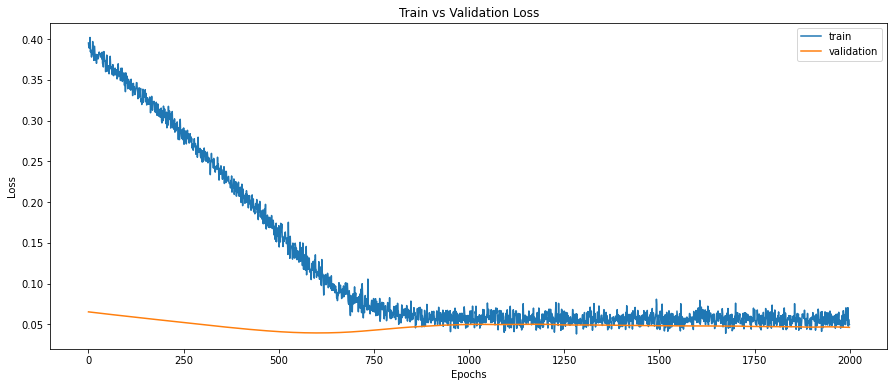

In [15]:
# plot the validation and training loss
plt.figure(figsize=(15,6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [16]:
# X_test[0];

print(X_test[0].shape)

print(X_test[0][0])

y_pred = np.zeros((X_test.shape[0],n_months))
X_test_model = np.zeros((X_test[0].shape[0],X_test[0].shape[1]))
for i in range(X_test_model.shape[0]):
    for j in range(X_test_model.shape[1]):
        X_test_model[i][j] = X_test[0][i][j]
        
print(X_test[0].shape)
pred = []
print(X_test_model)
print(X_test[0])


(10, 1)
[0.10949388]
(10, 1)
[[ 0.10949388]
 [-0.33540953]
 [ 0.14792899]
 [ 0.06259732]
 [ 0.8815748 ]
 [-0.1080315 ]
 [-0.0304905 ]
 [-0.04197967]
 [ 0.13575389]
 [-0.30960472]]
[[ 0.10949388]
 [-0.33540953]
 [ 0.14792899]
 [ 0.06259732]
 [ 0.8815748 ]
 [-0.1080315 ]
 [-0.0304905 ]
 [-0.04197967]
 [ 0.13575389]
 [-0.30960472]]


In [17]:
for i in range(X_test.shape[0]):
    # print("before X_test_model")
    # print(X_test_model)
    X_test_model = X_test_model.reshape(1,window,n_features)
#     print(X_test_model.shape)
    pred = model.predict(X_test_model,batch_size=1)
    X_test_model.reshape(window,n_features)
#     print(pred)
#     print(pred.shape)
#     print(pred.reshape(n_features,n_months))
    y_pred[i]=np.array(pred.reshape(n_features,n_months))
    # print("\ny_pred")
    # print(y_pred)
#     print("\nX_test_model[0]")
#     print(X_test_model[0][1])
    
    X_test_model[0,:-1] = X_test_model[0,1:]
    X_test_model[0,-1] = pred[0,0]
        
#     X_test_model[0][-1] = pred[0]
#     print("\nPred")
#     print(pred)
#     print(pred[0])
#     print("\n after X_test_model")
    # print(X_test_model)



1/1 [==============================] - 0s 52ms/step


In [18]:
# print(y_pred)
# print(y_test)

In [19]:
X_test = X_test.reshape(X_test.shape[0],window)
inv_pred = np.concatenate((y_pred, X_test[:,-(window):]), axis=1)
inv_pred = scaler.inverse_transform(inv_pred)
inv_pred = inv_pred[:,0:n_months]

inv_test=np.concatenate((y_test,X_test[:,-(window):]),axis=1)
inv_test = scaler.inverse_transform(inv_test)
inv_test = inv_test[:,0:n_months]

rmse = mean_squared_error(inv_pred, inv_test) ** (0.5)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 97.488


In [20]:
print(inv_pred)
print(inv_test)

[[259.17798094 272.84592537]
 [257.3248294  270.61423721]
 [261.02740491 274.03270685]
 [258.00472649 270.56960075]
 [255.8622972  268.07169975]
 [241.94606222 253.46623146]
 [241.87768883 253.2854057 ]
 [240.29485284 251.48225825]]
[[283.81932394 271.13658216]
 [262.24674178 292.90505164]
 [282.74069484 376.18      ]
 [361.14       274.93551174]
 [265.82324883 440.4       ]
 [421.6        315.75892958]
 [304.25650704 379.67742723]
 [364.43265728 419.23453521]]


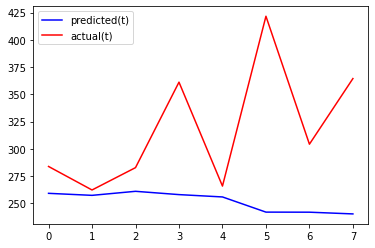

In [21]:
plt.plot(inv_pred[:,0],'b',label="predicted(t)")
plt.plot(inv_test[:,0],'r',label="actual(t)")
plt.legend()
plt.show()

In [22]:
# error calculation for train set
y_pred_tr = np.zeros((X_train.shape[0],n_months))
X_train_model = np.zeros((X_train[0].shape[0],X_train[0].shape[1]))
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        X_train_model[i][j] = X_train[0][i][j]

pred_train = []


for i in range(X_train.shape[0]):
#     print("before X_test_model")
#     print(X_train_model)
    X_train_model = X_train_model.reshape(1,window,n_features)

    pred_train = model.predict(X_train_model,batch_size=1)
    X_train_model.reshape(window,n_features)

    y_pred_tr[i]=np.array(pred_train.reshape(n_features,n_months))
#     print("\ny_pred")
#     print(y_pred_tr)

    
    X_train_model[0,:-1] = X_train_model[0,1:]
    X_train_model[0,-1] = pred_train[0,0]
        

1/1 [==============================] - 0s 46ms/step


In [23]:
X_train = X_train.reshape(X_train.shape[0],window)

In [24]:
inv_pred_tr = np.concatenate((y_pred_tr, X_train[:,-(window):]), axis=1)
inv_pred_tr = scaler.inverse_transform(inv_pred_tr)
inv_pred_tr = inv_pred_tr[:,0:n_months]

inv_test_tr=np.concatenate((y_train,X_train[:,-(window):]),axis=1)
inv_test_tr = scaler.inverse_transform(inv_test_tr)
inv_test_tr = inv_test_tr[:,0:n_months]

rmse = mean_squared_error(inv_pred_tr, inv_test_tr) ** (0.5)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 81.312


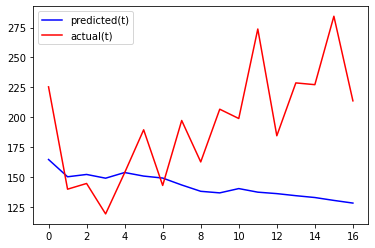

In [25]:
plt.plot(inv_pred_tr[:,0],'b',label="predicted(t)")
plt.plot(inv_test_tr[:,0],'r',label="actual(t)")
plt.legend()
plt.show()